## <span style="color: #ac6aad"> Project 8 - Introduction to Neural Network and Deep Learning (Venkata Harsha Vardhan Chunduri) </span>
## <span style="color: #ac6aad">Objective:  </span> 
##  Build a NN model to perform Digit Classification using SVHN database

### <span style="color: #ac6aad"> Import necessary libraries </span>

In [1]:
import h5py
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


### <span style="color: #ac6aad"> Load the X_train, X_test, Y_train, Y_test, X_val and Y_val datasets from the h5py file  </span> 

In [2]:
#Load SVHN_single_grey1 into a variable
inputFile = h5py.File('SVHN_single_grey1.h5', 'r')

#List the datasets available in the input h5 file
list(inputFile.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [3]:
#Load the X_train, X_test, Y_train, Y_test, X_val and Y_val datasets

X_test = inputFile['X_test']
X_train = inputFile['X_train']
X_val = inputFile['X_val']
y_test = inputFile['y_test']
y_train = inputFile['y_train']
y_val = inputFile['y_val']

### <span style="color: #ac6aad">Flatten the images for Keras </span>

#### <span style="color: #0000FF">This step has been performed as part of model creation. </span>
#### <span style="color: #0000FF">Flattening is peformed before output layer using the below </span>

#### <span style="color: #0000FF">model1.add(Flatten()) </span>

### <span style="color: #ac6aad">Normalize the inputs for X_train, X_test and X_val</span> 
#### Since 255 is the maximum value (including 0), we will divide the inputs by 255 to normalise the inputs.

In [4]:
# Find the shape of input datasets
print('Shape of X_train :' , X_train.shape)
print('Shape of X_test :' , X_test.shape)
print('Shape of X_val :' , X_val.shape)

Shape of X_train : (42000, 32, 32)
Shape of X_test : (18000, 32, 32)
Shape of X_val : (60000, 32, 32)


#### We can see, all the inputs are having dimensions 32 X 32, so we divide these by 32X32 array

In [5]:
#Build a 32X32 array filled with value '255'

a255 = np.full((32, 32), 255) 
a255 =a255.astype('float32')
a255

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

In [6]:
#Normalizing the input
X_train = X_train/a255
X_test = X_test/a255
X_val = X_val/a255

print('X_train shape is: ', X_train.shape, ' and has ',X_train.shape[0], ' train samples')
print('X_test shape is: ', X_test.shape, ' and has ',X_test.shape[0], ' train samples')
print('X_val shape is: ', X_val.shape, ' and has ',X_val.shape[0], ' train samples')

X_train shape is:  (42000, 32, 32)  and has  42000  train samples
X_test shape is:  (18000, 32, 32)  and has  18000  train samples
X_val shape is:  (60000, 32, 32)  and has  60000  train samples


### <span style="color: #ac6aad">Convert the class matrices Y_train, Y_test and Y_val into one hot vectors</span> 

In [7]:
# Using Keras 'utils.to_categorical' to convert class matrices to one hot vectors
# Our data is having 10 output classes, so we declare the number of classes as 10.
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

### <span style="color: #ac6aad">Print the train, test and val shapes</span>

In [8]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('X_val shape:', X_val.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print('y_val shape:', y_val.shape)

X_train shape: (42000, 32, 32)
X_test shape: (18000, 32, 32)
X_val shape: (60000, 32, 32)
y_train shape: (42000, 10)
y_test shape: (18000, 10)
y_val shape: (60000, 10)


### <span style="color: #ac6aad">Visualize the first 10 images in X_train and the corresponding Y_train labels</span>

First 10 images from X_train


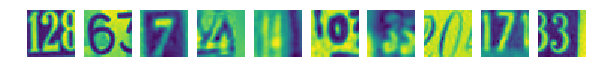

y_train labels for each of the above image:


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
print('First 10 images from X_train')
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()
print('y_train labels for each of the above image:')
(y_train[0:10])

#### From the above, we can see the nth value in the array corresponds to the value in the image.

### <span style="color: #ac6aad">In the train and test loop, define the hyperparameters for the model</span>

In [9]:
# Defining the hyperparameters for building the NN sequential model
learning_rate = 0.03

# Defining values for regularizeation parameters l1 (LASSO) and l2 (Ridge)
# Setting the initial values of l1 & l2 to 0.01
l1=0.01
l2=0.01

# Define batch size and epochs
batch_size = 200
epochs = 30

### <span style="color: #ac6aad"> Create a Sequential model in Keras with input layer with the correct input shape, Hidden Layers, Output Layers and the activation functions </span>

### Model 1 - Sequential with reLu activation function - 1 input, 5 hidden and output layers 

In [24]:
## input size
input_dim = X_train.shape[1:]

#Initialising a Sequential model
model1 = Sequential()

# Adding input layer
model1.add(Dense(num_classes * 8, input_shape=input_dim,  activation = 'relu'))

# Adding first hidden layer and relu activation fucntion
model1.add(Dense(num_classes * 8, activation = 'relu'))

# Adding second hidden layer with relu activation fucntion
model1.add(Dense(num_classes * 6, activation = 'relu'))

# Adding third hidden layer with relu activation fucntion
model1.add(Dense(num_classes * 4, activation = 'relu'))

# Adding forth hidden layer with relu activation fucntion
model1.add(Dense(num_classes * 2, activation = 'relu'))

# Adding fifth hidden layer with relu activation fucntion
model1.add(Dense(num_classes, activation = 'relu'))

# Flattening the output from previous layer
model1.add(Flatten())

#Output layer with Softmax activation function
model1.add(Dense(num_classes, activation = 'softmax'))

### <span style="color: #ac6aad">Define the optimizer to be used in this model</span>

In [25]:
# Defining SGD optimizer
optimizer = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)

### <span style="color: #ac6aad">Compile the model with the corresponding Loss and metrics to monitor</span>

In [26]:
#Compiling the model with 'categorical_crossentropy' loss variable and accuracy metrics as this is a classification model
model1.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

### <span style="color: #ac6aad">Initializing Early stopping callback</span>

In [27]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

### <span style="color: #ac6aad">Initializing Model chekpoint callbacks</span>

In [28]:
#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint1 =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

### <span style="color: #ac6aad">Fit the model and use model.evaluate() to return the score</span>

In [29]:
#Training on the dataset and adding the all the callbacks to the fit function.
model1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val), 
          callbacks = [early_stopping,model_checkpoint1])

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 7s 169us/step - loss: 2.3020 - accuracy: 0.1041 - val_loss: 2.2964 - val_accuracy: 0.1337

Epoch 00001: val_loss improved from inf to 2.29636, saving model to mnist_cnn_checkpoint_01_loss2.2964.h5
Epoch 2/30
42000/42000 [==============================] - 7s 167us/step - loss: 2.1184 - accuracy: 0.2349 - val_loss: 1.8458 - val_accuracy: 0.3664

Epoch 00002: val_loss improved from 2.29636 to 1.84578, saving model to mnist_cnn_checkpoint_02_loss1.8458.h5
Epoch 3/30
42000/42000 [==============================] - 7s 164us/step - loss: 1.7135 - accuracy: 0.4420 - val_loss: 1.4665 - val_accuracy: 0.5375

Epoch 00003: val_loss improved from 1.84578 to 1.46653, saving model to mnist_cnn_checkpoint_03_loss1.4665.h5
Epoch 4/30
42000/42000 [==============================] - 7s 168us/step - loss: 1.4133 - accuracy: 0.5549 - val_loss: 1.2896 - val_accuracy: 0.5989

Epoch 00004: val_loss improv

#### From this model, we are getting a validation accuracy of 72.44% 

In [30]:
# Lets find the scores on validations and test data using this trained model
scores_mv1 = model1.evaluate(X_val, y_val, verbose=1)
print('Val loss:', scores_mv1[0])
print('Val accuracy:', scores_mv1[1])

scores_mt1 = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_mt1[0])
print('Test accuracy:', scores_mt1[1])

60000/60000 [==============================] - 4s 61us/step
Val loss: 0.895746142522494
Val accuracy: 0.7244333624839783
18000/18000 [==============================] - 1s 61us/step
Test loss: 0.9729620463583204
Test accuracy: 0.7037222385406494


### <span style="color: #ac6aad">Disable Regularization by setting appropriate value for Lambda and check the loss of the NN</span>

#### We have anyway not used any regularisation parameter in the previous model, however making the l1 & l2 parameters as 0 adding regularisation in each of the layers to create a 2nd model

### Model2 - Disabling regularisation

In [19]:
#Disable regularisation
l1=0
l2=0

# input size
input_dim = X_train.shape[1:]

#Initialising a Sequential model
model2 = Sequential()

# Adding first layer and relu activation fucntion and l1,l2 regularisation
model2.add(Dense(num_classes * 8, input_shape=input_dim,  activation = 'relu', activity_regularizer=regularizers.l1(l1),kernel_regularizer=regularizers.l2(l2)))

# Adding first hidden layer and relu activation fucntion and l1,l2 regularisation
model2.add(Dense(num_classes * 8, activation = 'relu', activity_regularizer=regularizers.l1(l1),kernel_regularizer=regularizers.l2(l2)))

# Adding second layer with relu activation fucntion and l1,l2 regularisation
model2.add(Dense(num_classes * 6, activation = 'relu', activity_regularizer=regularizers.l1(l1),kernel_regularizer=regularizers.l2(l2)))

# Adding third layer with relu activation fucntion and l1,l2 regularisation
model2.add(Dense(num_classes * 4, activation = 'relu', activity_regularizer=regularizers.l1(l1),kernel_regularizer=regularizers.l2(l2)))

# Adding forth layer with relu activation fucntion and l1,l2 regularisation
model2.add(Dense(num_classes * 2, activation = 'relu', activity_regularizer=regularizers.l1(l1),kernel_regularizer=regularizers.l2(l2)))

# Adding fifth layer with relu activation fucntion and l1,l2 regularisation
model2.add(Dense(num_classes, activation = 'relu', activity_regularizer=regularizers.l1(l1),kernel_regularizer=regularizers.l2(l2)))

# Flattening the output from previous layer
model2.add(Flatten())

#Output layer with Softmax activation function
model2.add(Dense(num_classes, activation = 'softmax'))

In [20]:
#Compiling the model with 'categorical_crossentropy' loss variable and accuracy metrics as this is a classification model
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint2 =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [21]:
#Training on the dataset and adding the all the callbacks to the fit function.
model2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val), 
          callbacks = [early_stopping,model_checkpoint2])

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 7s 171us/step - loss: 2.3031 - accuracy: 0.1011 - val_loss: 2.3022 - val_accuracy: 0.1040

Epoch 00001: val_loss improved from inf to 2.30223, saving model to mnist_cnn_checkpoint_01_loss2.3022.h5
Epoch 2/30
42000/42000 [==============================] - 7s 165us/step - loss: 2.2959 - accuracy: 0.1252 - val_loss: 2.2546 - val_accuracy: 0.1816

Epoch 00002: val_loss improved from 2.30223 to 2.25464, saving model to mnist_cnn_checkpoint_02_loss2.2546.h5
Epoch 3/30
42000/42000 [==============================] - 8s 184us/step - loss: 2.0568 - accuracy: 0.2944 - val_loss: 1.7899 - val_accuracy: 0.4220

Epoch 00003: val_loss improved from 2.25464 to 1.78992, saving model to mnist_cnn_checkpoint_03_loss1.7899.h5
Epoch 4/30
42000/42000 [==============================] - 7s 170us/step - loss: 1.7768 - accuracy: 0.4260 - val_loss: 1.6795 - val_accuracy: 0.4682

Epoch 00004: val_loss improv

#### From the new model with l1 & l2 as 0 , after 30 epocs, we see a validation accuracy of 77.245 and loss of 0.8934, however the best values have been achieved even before 30 epocs

In [22]:
# Lets find the scores on validations and test data using this trained model
scores_mv2 = model2.evaluate(X_val, y_val, verbose=1)
print('Val loss:', scores_mv2[0])
print('Val accuracy:', scores_mv2[1])

scores_mt2 = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_mt2[0])
print('Test accuracy:', scores_mt2[1])

60000/60000 [==============================] - 4s 62us/step
Val loss: 0.9076027659654617
Val accuracy: 0.7244666814804077
18000/18000 [==============================] - 1s 62us/step
Test loss: 0.9741645645565457
Test accuracy: 0.7059444189071655


#### The test accuracy on 2nd model is 70.59% and the earlier model without regularisation was 70.37%, there is no much appreaciable change in the values.
#### Lets proceed to tune the parameters further

In [32]:
# Introducing another regularisation parameter Dropout with an initial value of 0.25 and build a new model

### Model3 : Introducing Drop Out

In [41]:
## input size
input_dim = X_train.shape[1:]

#Initialising a Sequential model
model3 = Sequential()

# Adding first layer and relu activation fucntion
model3.add(Dense(num_classes * 8, input_shape=input_dim,  activation = 'relu'))
#Add a drop out of 0.25
model3.add(Dropout(0.25))

# Adding first hidden layer and relu activation fucntion
model3.add(Dense(num_classes * 8, activation = 'relu'))
#Add a drop out of 0.25
model3.add(Dropout(0.25))
           
# Adding second hidden layer with relu activation fucntion
model3.add(Dense(num_classes * 6, activation = 'relu'))
#Add a drop out of 0.25
model3.add(Dropout(0.25))

# Adding third hidden layer with relu activation fucntion
model3.add(Dense(num_classes * 4, activation = 'relu'))
#Add a drop out of 0.25
model3.add(Dropout(0.25))

# Adding forth hidden layer with relu activation fucntion
model3.add(Dense(num_classes * 2, activation = 'relu'))
#Add a drop out of 0.25
model3.add(Dropout(0.25))

# Adding fifth hidden layer with relu activation fucntion
model3.add(Dense(num_classes, activation = 'relu'))
#Add a drop out of 0.25
model3.add(Dropout(0.25))

# Flattening the output from previous layer
model3.add(Flatten())

#Output layer with Softmax activation function
model3.add(Dense(num_classes, activation = 'softmax'))

In [42]:
#Compiling the model with 'categorical_crossentropy' loss variable and accuracy metrics as this is a classification model
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint3 =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [43]:
#Training on the dataset and adding the all the callbacks to the fit function.
model3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val), 
          callbacks = [early_stopping,model_checkpoint3])

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 15s 362us/step - loss: 2.3039 - accuracy: 0.1009 - val_loss: 2.3028 - val_accuracy: 0.1000

Epoch 00001: val_loss improved from inf to 2.30278, saving model to mnist_cnn_checkpoint_01_loss2.3028.h5
Epoch 2/30
42000/42000 [==============================] - 14s 329us/step - loss: 2.3030 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.1000

Epoch 00002: val_loss did not improve from 2.30278
Epoch 3/30
42000/42000 [==============================] - 14s 331us/step - loss: 2.3030 - accuracy: 0.1015 - val_loss: 2.3027 - val_accuracy: 0.1000

Epoch 00003: val_loss improved from 2.30278 to 2.30272, saving model to mnist_cnn_checkpoint_03_loss2.3027.h5
Epoch 4/30
42000/42000 [==============================] - 14s 328us/step - loss: 2.3030 - accuracy: 0.1010 - val_loss: 2.3028 - val_accuracy: 0.1000

Epoch 00004: val_loss did not improve from 2.30272
Epoch 5/30
42000/42000 [========

#### With dropout, we could achieve 62.53% accuracy at a loss of 1.345 on vlaidation data

In [44]:
# Lets find the scores on validations and test data using this trained model
scores_mv3 = model3.evaluate(X_val, y_val, verbose=1)
print('Val loss:', scores_mv3[0])
print('Val accuracy:', scores_mv3[1])

scores_mt3 = model3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_mt3[0])
print('Test accuracy:', scores_mt3[1])

60000/60000 [==============================] - 4s 66us/step
Val loss: 1.190269003756841
Val accuracy: 0.625333309173584
18000/18000 [==============================] - 1s 66us/step
Test loss: 1.1979000857671103
Test accuracy: 0.6243888735771179


#### From the above, we could achieve an accuracy of 62.44% on test data
#### Based on all the 3 models, adding dropout didnt prove any beneficial in this case with other parameters being same.

### <span style="color: #ac6aad"> Increase the Regularization parameter (Lambda) and check how the loss is for the NN. Record findings </span>

### Model4 - Increase Regularisation Dropput to 0.5

In [52]:
# To validate the above, lets repeat the dropout scenario first by increasing the dropout to 0.5
## input size
input_dim = X_train.shape[1:]

#Initialising a Sequential model
model4 = Sequential()

# Adding first layer and relu activation fucntion
model4.add(Dense(num_classes * 8, input_shape=input_dim,  activation = 'relu'))
#Add a drop out of 0.5
model4.add(Dropout(0.5))

# Adding first hidden layer and relu activation fucntion
model4.add(Dense(num_classes * 8, activation = 'relu'))
#Add a drop out of 0.5
model4.add(Dropout(0.5))
           
# Adding second hidden layer with relu activation fucntion
model4.add(Dense(num_classes * 6, activation = 'relu'))
#Add a drop out of 0.5
model4.add(Dropout(0.5))

# Adding third hidden layer with relu activation fucntion
model4.add(Dense(num_classes * 4, activation = 'relu'))
#Add a drop out of 0.5
model4.add(Dropout(0.5))

# Adding forth hidden layer with relu activation fucntion
model3.add(Dense(num_classes * 2, activation = 'relu'))
#Add a drop out of 0.5
model4.add(Dropout(0.5))

# Adding fifth hidden layer with relu activation fucntion
model4.add(Dense(num_classes, activation = 'relu'))
#Add a drop out of 0.5
model4.add(Dropout(0.5))

# Flattening the output from previous layer
model4.add(Flatten())

#Output layer with Softmax activation function
model4.add(Dense(num_classes, activation = 'softmax'))

In [53]:
#Compiling the model with 'categorical_crossentropy' loss variable and accuracy metrics as this is a classification model
model4.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint4 =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [54]:
#Training on the dataset and adding the all the callbacks to the fit function.
model4.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val), 
          callbacks = [early_stopping,model_checkpoint4])

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 14s 332us/step - loss: 2.3076 - accuracy: 0.1001 - val_loss: 2.3028 - val_accuracy: 0.1000

Epoch 00001: val_loss improved from inf to 2.30276, saving model to mnist_cnn_checkpoint_01_loss2.3028.h5
Epoch 2/30
42000/42000 [==============================] - 14s 338us/step - loss: 2.3030 - accuracy: 0.0995 - val_loss: 2.3029 - val_accuracy: 0.1000

Epoch 00002: val_loss did not improve from 2.30276
Epoch 3/30
42000/42000 [==============================] - 14s 335us/step - loss: 2.3030 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1000

Epoch 00003: val_loss did not improve from 2.30276
Epoch 4/30
42000/42000 [==============================] - 15s 347us/step - loss: 2.3031 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1000

Epoch 00004: val_loss improved from 2.30276 to 2.30274, saving model to mnist_cnn_checkpoint_04_loss2.3027.h5
Epoch 5/30
42000/42000 [========

#### Increasing the dropout regularisation to 0.5 -> Accuracy has reduced to just 10% on validation dataset

In [55]:
# Lets find the scores on validations and test data using this trained model
scores_mv4 = model4.evaluate(X_val, y_val, verbose=1)
print('Val loss:', scores_mv4[0])
print('Val accuracy:', scores_mv4[1])

scores_mt4 = model4.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_mt4[0])
print('Test accuracy:', scores_mt4[1])

60000/60000 [==============================] - 4s 63us/step
Val loss: 2.302866602071126
Val accuracy: 0.10000000149011612
18000/18000 [==============================] - 1s 62us/step
Test loss: 2.303016716003418
Test accuracy: 0.09549999982118607


#### Test accuracy is 9.54% which is very very less compared to previous accuracy and loss increased from 1.19 to 2.3

#### We can see that accuracy is dropping and loss is increasing when we increase the regularisation

### Model5 l1,l2 @ 0.01

In [57]:
#Disable regularisation
l1=0.001
l2=0.001

# input size
input_dim = X_train.shape[1:]

#Initialising a Sequential model
model5 = Sequential()

# Adding first layer and relu activation fucntion and l1,l2 regularisation
model5.add(Dense(num_classes * 8, input_shape=input_dim,  activation = 'relu', activity_regularizer=regularizers.l1(l1),kernel_regularizer=regularizers.l2(l2)))

# Adding first hidden layer and relu activation fucntion and l1,l2 regularisation
model5.add(Dense(num_classes * 8, activation = 'relu', activity_regularizer=regularizers.l1(l1),kernel_regularizer=regularizers.l2(l2)))

# Adding second layer with relu activation fucntion and l1,l2 regularisation
model5.add(Dense(num_classes * 6, activation = 'relu', activity_regularizer=regularizers.l1(l1),kernel_regularizer=regularizers.l2(l2)))

# Adding third layer with relu activation fucntion and l1,l2 regularisation
model5.add(Dense(num_classes * 4, activation = 'relu', activity_regularizer=regularizers.l1(l1),kernel_regularizer=regularizers.l2(l2)))

# Adding forth layer with relu activation fucntion and l1,l2 regularisation
model5.add(Dense(num_classes * 2, activation = 'relu', activity_regularizer=regularizers.l1(l1),kernel_regularizer=regularizers.l2(l2)))

# Adding fifth layer with relu activation fucntion and l1,l2 regularisation
model5.add(Dense(num_classes, activation = 'relu', activity_regularizer=regularizers.l1(l1),kernel_regularizer=regularizers.l2(l2)))

# Flattening the output from previous layer
model5.add(Flatten())

#Output layer with Softmax activation function
model5.add(Dense(num_classes, activation = 'softmax'))

In [58]:
#Compiling the model with 'categorical_crossentropy' loss variable and accuracy metrics as this is a classification model
model5.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint5 =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [59]:
#Training on the dataset and adding the all the callbacks to the fit function.
model5.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val), 
          callbacks = [early_stopping,model_checkpoint5])

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 11s 251us/step - loss: 17.5560 - accuracy: 0.0984 - val_loss: 15.1686 - val_accuracy: 0.1000

Epoch 00001: val_loss improved from inf to 15.16856, saving model to mnist_cnn_checkpoint_01_loss15.1686.h5
Epoch 2/30
42000/42000 [==============================] - 10s 240us/step - loss: 13.7044 - accuracy: 0.1002 - val_loss: 12.3433 - val_accuracy: 0.1000

Epoch 00002: val_loss improved from 15.16856 to 12.34332, saving model to mnist_cnn_checkpoint_02_loss12.3433.h5
Epoch 3/30
42000/42000 [==============================] - 10s 238us/step - loss: 11.2009 - accuracy: 0.0992 - val_loss: 10.1387 - val_accuracy: 0.1000

Epoch 00003: val_loss improved from 12.34332 to 10.13867, saving model to mnist_cnn_checkpoint_03_loss10.1387.h5
Epoch 4/30
42000/42000 [==============================] - 10s 247us/step - loss: 9.2474 - accuracy: 0.0989 - val_loss: 8.4186 - val_accuracy: 0.1000

Epoch 0000

#### Increasing the values of l1 & l2 from 0 to 0.01 has resulted in drop in accuracy and increase in loss on validation data

In [60]:
# Lets find the scores on validations and test data using this trained model
scores_mv5 = model5.evaluate(X_val, y_val, verbose=1)
print('Val loss:', scores_mv5[0])
print('Val accuracy:', scores_mv5[1])

scores_mt5 = model5.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_mt5[0])
print('Test accuracy:', scores_mt5[1])

60000/60000 [==============================] - 4s 71us/step
Val loss: 2.3126665828704835
Val accuracy: 0.10000000149011612
18000/18000 [==============================] - 1s 74us/step
Test loss: 2.3128197659386527
Test accuracy: 0.10044444352388382


#### We can see with l1 & l2 at 0.01, accuracy is only 10% and loss is 2.31 on test dataset.

### <span style="color: #0000FF">Below table gives the observations from 5 models built. We have observed a best accuracy of 70.59 & and least loss of 0.9741 when regularisation parameters l1 & l2 is 0. </span>

<table>
    <tr>
        <td>S.no</td>
        <td>No.of Layers </td>
        <td>Regularisation Lambda(λ) Dropout </td>
        <td>Regularisation L1, L2</td>
        <td>Optimiser</td>
        <td>Learning Rate</td>
        <td>Loss (test data)</td>
        <td>Accuracy (test data) % </td>
    </tr>
    <tr>
        <td>1</td>
        <td>5</td>
        <td>NA</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>0.972</td>
        <td>70.37</td>
    </tr>
   <tr style="font-weight:bold; color:blue">
        <td>2</td>
        <td>5</td>
        <td>NA</td>
        <td>0</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>0.9741</td>
        <td>70.59</td>
    </tr>
    <tr>
        <td>3</td>
        <td>5</td>
        <td>0.25</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>1.19</td>
        <td>62.44</td>
    </tr>
    <tr>
        <td>4</td>
        <td>5</td>
        <td>0.50</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>2.30</td>
        <td>9.5</td>
    </tr>
    <tr>
        <td>5</td>
        <td>5</td>
        <td>NA</td>
        <td>0.01</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>2.31</td>
        <td>10.04</td>
    </tr>
</table>


### <span style="color: #ac6aad"> Network overfit with a small subset of the dataset. Check if the network will overfit when you use no regularization and the loss is very small and accuracy is 100%. </span>

### Take a subset of 1000 rows from the input dataset

In [121]:
X_test100 = X_test[0:1000]
X_train100 = X_train[0:1000]
X_val100 = X_val[0:1000]
y_test100 = y_test[0:1000]
y_train100 = y_train[0:1000]
y_val100 = y_val[0:1000]

In [122]:
print('X_train shape:', X_train100.shape)
print('X_test shape:', X_test100.shape)
print('X_val shape:', X_val100.shape)
print('y_train shape:', y_train100.shape)
print('y_test shape:', y_test100.shape)
print('y_val shape:', y_val100.shape)

X_train shape: (1000, 32, 32)
X_test shape: (1000, 32, 32)
X_val shape: (1000, 32, 32)
y_train shape: (1000, 10)
y_test shape: (1000, 10)
y_val shape: (1000, 10)


In [123]:
## input size
input_dim = X_train100.shape[1:]

#Initialising a Sequential model
model14 = Sequential()

# Adding input layer
model14.add(Dense(num_classes * 8, input_shape=input_dim,  activation = 'relu'))

# Adding first hidden layer and relu activation fucntion
model14.add(Dense(num_classes * 8, activation = 'relu'))

# Adding second hidden layer with relu activation fucntion
model14.add(Dense(num_classes * 6, activation = 'relu'))

# Adding third hidden layer with relu activation fucntion
model14.add(Dense(num_classes * 4, activation = 'relu'))

# Adding forth hidden layer with relu activation fucntion
model14.add(Dense(num_classes * 2, activation = 'relu'))

# Adding fifth hidden layer with relu activation fucntion
model14.add(Dense(num_classes, activation = 'relu'))

# Flattening the output from previous layer
model14.add(Flatten())

#Output layer with Softmax activation function
model14.add(Dense(num_classes, activation = 'softmax'))

In [124]:
# Defining SGD optimizer
optimizer_ss = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)

In [125]:
#Compiling the model with 'categorical_crossentropy' loss variable and accuracy metrics as this is a classification model
model14.compile(loss='categorical_crossentropy',
              optimizer=optimizer_ss,
              metrics=['accuracy'])

In [126]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

In [127]:
#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint14 =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [128]:
#Training on the dataset and adding the all the callbacks to the fit function.
model14.fit(X_train100, y_train100,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val100, y_val100), 
          callbacks = [early_stopping,model_checkpoint14])

Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 365us/step - loss: 2.3030 - accuracy: 0.0780 - val_loss: 2.2879 - val_accuracy: 0.0130

Epoch 00001: val_loss improved from inf to 2.28791, saving model to mnist_cnn_checkpoint_01_loss2.2879.h5
Epoch 2/30
1000/1000 [==============================] - 0s 163us/step - loss: 2.3011 - accuracy: 0.0980 - val_loss: 2.2836 - val_accuracy: 0.0330

Epoch 00002: val_loss improved from 2.28791 to 2.28365, saving model to mnist_cnn_checkpoint_02_loss2.2836.h5
Epoch 3/30
1000/1000 [==============================] - 0s 161us/step - loss: 2.2996 - accuracy: 0.1220 - val_loss: 2.2722 - val_accuracy: 0.0170

Epoch 00003: val_loss improved from 2.28365 to 2.27222, saving model to mnist_cnn_checkpoint_03_loss2.2722.h5
Epoch 4/30
1000/1000 [==============================] - 0s 164us/step - loss: 2.2981 - accuracy: 0.1270 - val_loss: 2.2614 - val_accuracy: 0.0130

Epoch 00004: val_loss improved from 2.

In [129]:
# Lets find the scores on validations and test data using this trained model
scores_mv14 = model14.evaluate(X_val100, y_val100, verbose=1)
print('Val loss:', scores_mv14[0])
print('Val accuracy:', scores_mv14[1])

scores_mt14 = model14.evaluate(X_test100, y_test100, verbose=1)
print('Test loss:', scores_mt14[0])
print('Test accuracy:', scores_mt14[1])

1000/1000 [==============================] - 0s 78us/step
Val loss: 2.1305630187988283
Val accuracy: 0.5400000214576721
1000/1000 [==============================] - 0s 71us/step
Test loss: 2.2945315208435058
Test accuracy: 0.13300000131130219


### <span style="color: #0000FF"> A subset of 1000 records has been taken from the original dataset and sequential model is created without any regularisation. After training for 30 epocs a validation accuracy of 54.00% and Test accuracy of 13.30 % is observed. </br> Could not observe any overfitting behavior. </span>

### <span style="color: #ac6aad"> Load the original dataset with all the images and prepare the data for modelling </span>

In [61]:
#Load SVHN_single_grey1 into a variable
inputFile = h5py.File('SVHN_single_grey1.h5', 'r')

#List the datasets available in the input h5 file
list(inputFile.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [62]:
X_test = inputFile['X_test']
X_train = inputFile['X_train']
X_val = inputFile['X_val']
y_test = inputFile['y_test']
y_train = inputFile['y_train']
y_val = inputFile['y_val']

In [63]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('X_val shape:', X_val.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print('y_val shape:', y_val.shape)

X_train shape: (42000, 32, 32)
X_test shape: (18000, 32, 32)
X_val shape: (60000, 32, 32)
y_train shape: (42000,)
y_test shape: (18000,)
y_val shape: (60000,)


In [67]:
#Normalizing the input
X_train = X_train/a255
X_test = X_test/a255
X_val = X_val/a255

In [68]:
# Using Keras 'utils.to_categorical' to convert class matrices to one hot vectors
# Our data is having 10 output classes, so we declare the number of classes as 10.
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

### <span style="color: #ac6aad"> Start with a small Regularization. Keep adjusting the learning rate to check the loss. Record findings </span>

#### Lets consider dropout regularisation with a lambda value of 0.1 and build a sequential model

In [64]:
## input size
input_dim = X_train.shape[1:]

#Initialising a Sequential model
model6 = Sequential()

# Adding first layer and relu activation fucntion
model6.add(Dense(num_classes * 8, input_shape=input_dim,  activation = 'relu'))
#Add a drop out of 0.1
model6.add(Dropout(0.1))

# Adding first hidden layer and relu activation fucntion
model6.add(Dense(num_classes * 8, activation = 'relu'))
#Add a drop out of 0.1
model6.add(Dropout(0.1))
           
# Adding second hidden layer with relu activation fucntion
model6.add(Dense(num_classes * 6, activation = 'relu'))
#Add a drop out of 0.1
model6.add(Dropout(0.1))

# Adding third hidden layer with relu activation fucntion
model6.add(Dense(num_classes * 4, activation = 'relu'))
#Add a drop out of 0.1
model6.add(Dropout(0.1))

# Adding forth hidden layer with relu activation fucntion
model6.add(Dense(num_classes * 2, activation = 'relu'))
#Add a drop out of 0.1
model6.add(Dropout(0.1))

# Adding fifth hidden layer with relu activation fucntion
model6.add(Dense(num_classes, activation = 'relu'))
#Add a drop out of 0.1
model6.add(Dropout(0.1))

# Flattening the output from previous layer
model6.add(Flatten())

#Output layer with Softmax activation function
model6.add(Dense(num_classes, activation = 'softmax'))

In [65]:
#Compiling the model with 'categorical_crossentropy' loss variable and accuracy metrics as this is a classification model
model6.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint6 =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [69]:
#Training on the dataset and adding the all the callbacks to the fit function.
model6.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val), 
          callbacks = [early_stopping,model_checkpoint6])

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 15s 349us/step - loss: 2.3036 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1003

Epoch 00001: val_loss improved from inf to 2.30271, saving model to mnist_cnn_checkpoint_01_loss2.3027.h5
Epoch 2/30
42000/42000 [==============================] - 14s 336us/step - loss: 2.3031 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000

Epoch 00002: val_loss did not improve from 2.30271
Epoch 3/30
42000/42000 [==============================] - 14s 343us/step - loss: 2.3031 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.1006

Epoch 00003: val_loss did not improve from 2.30271
Epoch 4/30
42000/42000 [==============================] - 14s 345us/step - loss: 2.3030 - accuracy: 0.1013 - val_loss: 2.3028 - val_accuracy: 0.1001

Epoch 00004: val_loss did not improve from 2.30271
Epoch 5/30
42000/42000 [==============================] - 16s 369us/step - loss: 2.3029 - a

#### Validation accuracy has increased to 70.02% (with dropout 0.1) from 62.4% (with dropout 0.25)

In [70]:
# Lets find the scores on validations and test data using this trained model
scores_mv6 = model6.evaluate(X_val, y_val, verbose=1)
print('Val loss:', scores_mv6[0])
print('Val accuracy:', scores_mv6[1])

scores_mt6 = model6.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_mt6[0])
print('Test accuracy:', scores_mt6[1])

60000/60000 [==============================] - 4s 67us/step
Val loss: 0.9618066359361013
Val accuracy: 0.700166642665863
18000/18000 [==============================] - 1s 69us/step
Test loss: 0.9953361388842265
Test accuracy: 0.6899444460868835


#### Test accuarcy of 69% could be achieved using droput 0.1.

### <span style="color: #0000FF"> Increasing the learning Rate </span>

In [71]:
## input size
input_dim = X_train.shape[1:]

#Initialising a Sequential model
model7 = Sequential()

# Adding first layer and relu activation fucntion
model7.add(Dense(num_classes * 8, input_shape=input_dim,  activation = 'relu'))
#Add a drop out of 0.1
model7.add(Dropout(0.1))

# Adding first hidden layer and relu activation fucntion
model7.add(Dense(num_classes * 8, activation = 'relu'))
#Add a drop out of 0.1
model7.add(Dropout(0.1))
           
# Adding second hidden layer with relu activation fucntion
model7.add(Dense(num_classes * 6, activation = 'relu'))
#Add a drop out of 0.1
model7.add(Dropout(0.1))

# Adding third hidden layer with relu activation fucntion
model7.add(Dense(num_classes * 4, activation = 'relu'))
#Add a drop out of 0.1
model7.add(Dropout(0.1))

# Adding forth hidden layer with relu activation fucntion
model7.add(Dense(num_classes * 2, activation = 'relu'))
#Add a drop out of 0.1
model7.add(Dropout(0.1))

# Adding fifth hidden layer with relu activation fucntion
model7.add(Dense(num_classes, activation = 'relu'))
#Add a drop out of 0.1
model7.add(Dropout(0.1))

# Flattening the output from previous layer
model7.add(Flatten())

#Output layer with Softmax activation function
model7.add(Dense(num_classes, activation = 'softmax'))

In [72]:
# Defining SGD optimizer. Increasing the learnign rate lr from 0.03 (previous case) to 0.05
optimizer_sgd_lr003 = keras.optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)

In [73]:
#Compiling the model with 'categorical_crossentropy' loss variable and accuracy metrics as this is a classification model
model7.compile(loss='categorical_crossentropy',
              optimizer=optimizer_sgd_lr003,
              metrics=['accuracy'])

#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint7 =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [74]:
#Training on the dataset and adding the all the callbacks to the fit function.
model7.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val), 
          callbacks = [early_stopping,model_checkpoint7])

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 14s 345us/step - loss: 2.3036 - accuracy: 0.0981 - val_loss: 2.3031 - val_accuracy: 0.1000

Epoch 00001: val_loss improved from inf to 2.30306, saving model to mnist_cnn_checkpoint_01_loss2.3031.h5
Epoch 2/30
42000/42000 [==============================] - 15s 345us/step - loss: 2.3032 - accuracy: 0.0996 - val_loss: 2.3030 - val_accuracy: 0.0997

Epoch 00002: val_loss improved from 2.30306 to 2.30301, saving model to mnist_cnn_checkpoint_02_loss2.3030.h5
Epoch 3/30
42000/42000 [==============================] - 15s 362us/step - loss: 2.3032 - accuracy: 0.1008 - val_loss: 2.3029 - val_accuracy: 0.1000

Epoch 00003: val_loss improved from 2.30301 to 2.30291, saving model to mnist_cnn_checkpoint_03_loss2.3029.h5
Epoch 4/30
42000/42000 [==============================] - 15s 360us/step - loss: 2.3033 - accuracy: 0.0963 - val_loss: 2.3029 - val_accuracy: 0.1000

Epoch 00004: val_loss im

In [75]:
# Lets find the scores on validations and test data using this trained model
scores_mv7 = model7.evaluate(X_val, y_val, verbose=1)
print('Val loss:', scores_mv7[0])
print('Val accuracy:', scores_mv7[1])

scores_mt7 = model7.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_mt7[0])
print('Test accuracy:', scores_mt7[1])

60000/60000 [==============================] - 4s 69us/step
Val loss: 2.302724337641398
Val accuracy: 0.10000000149011612
18000/18000 [==============================] - 1s 68us/step
Test loss: 2.302761360168457
Test accuracy: 0.10066666454076767


### Increasing the learning rate from 0.03 to 0.05 keeping all the other parameters to be same has decreased the accuracy drastically to 10%

### Model8 - Changing the learning rate to 0.01

In [76]:
## input size
input_dim = X_train.shape[1:]

#Initialising a Sequential model
model8 = Sequential()

# Adding first layer and relu activation fucntion
model8.add(Dense(num_classes * 8, input_shape=input_dim,  activation = 'relu'))
#Add a drop out of 0.1
model8.add(Dropout(0.1))

# Adding first hidden layer and relu activation fucntion
model8.add(Dense(num_classes * 8, activation = 'relu'))
#Add a drop out of 0.1
model8.add(Dropout(0.1))
           
# Adding second hidden layer with relu activation fucntion
model8.add(Dense(num_classes * 6, activation = 'relu'))
#Add a drop out of 0.1
model8.add(Dropout(0.1))

# Adding third hidden layer with relu activation fucntion
model8.add(Dense(num_classes * 4, activation = 'relu'))
#Add a drop out of 0.1
model8.add(Dropout(0.1))

# Adding forth hidden layer with relu activation fucntion
model8.add(Dense(num_classes * 2, activation = 'relu'))
#Add a drop out of 0.1
model8.add(Dropout(0.1))

# Adding fifth hidden layer with relu activation fucntion
model8.add(Dense(num_classes, activation = 'relu'))
#Add a drop out of 0.1
model8.add(Dropout(0.1))

# Flattening the output from previous layer
model8.add(Flatten())

#Output layer with Softmax activation function
model8.add(Dense(num_classes, activation = 'softmax'))

In [77]:
# Defining SGD optimizer. Increasing the learnign rate lr from 0.03 (previous case) to 0.05
optimizer_sgd_lr003 = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#Compiling the model with 'categorical_crossentropy' loss variable and accuracy metrics as this is a classification model
model8.compile(loss='categorical_crossentropy',
              optimizer=optimizer_sgd_lr003,
              metrics=['accuracy'])

#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint8 =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [78]:
#Training on the dataset and adding the all the callbacks to the fit function.
model8.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val), 
          callbacks = [early_stopping,model_checkpoint8])

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 14s 341us/step - loss: 2.3032 - accuracy: 0.1005 - val_loss: 2.3025 - val_accuracy: 0.1014

Epoch 00001: val_loss improved from inf to 2.30250, saving model to mnist_cnn_checkpoint_01_loss2.3025.h5
Epoch 2/30
42000/42000 [==============================] - 14s 333us/step - loss: 2.3029 - accuracy: 0.0999 - val_loss: 2.3025 - val_accuracy: 0.0999

Epoch 00002: val_loss did not improve from 2.30250
Epoch 3/30
42000/42000 [==============================] - 14s 330us/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3022 - val_accuracy: 0.1004

Epoch 00003: val_loss improved from 2.30250 to 2.30220, saving model to mnist_cnn_checkpoint_03_loss2.3022.h5
Epoch 4/30
42000/42000 [==============================] - 14s 338us/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3020 - val_accuracy: 0.1060

Epoch 00004: val_loss improved from 2.30220 to 2.30199, saving model to mnist_cnn_c

In [79]:
# Lets find the scores on validations and test data using this trained model
scores_mv8 = model8.evaluate(X_val, y_val, verbose=1)
print('Val loss:', scores_mv8[0])
print('Val accuracy:', scores_mv8[1])

scores_mt8 = model8.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_mt8[0])
print('Test accuracy:', scores_mt8[1])

60000/60000 [==============================] - 4s 67us/step
Val loss: 1.0470961561520895
Val accuracy: 0.6763333082199097
18000/18000 [==============================] - 1s 67us/step
Test loss: 1.0644049133724636
Test accuracy: 0.670722246170044


### Test accuracy has improved significantly with learnign rate of 0.01 compared to lr of 0.05, however it is less when compared to accuracy at learning rate of 0.03

<table>
    <tr>
        <td>S.no</td>
        <td>No.of Layers </td>
        <td>Regularisation Lambda(λ) Dropout </td>
        <td>Regularisation L1, L2</td>
        <td>Optimiser</td>
        <td>Learning Rate</td>
        <td>Loss (test data)</td>
        <td>Accuracy (test data) % </td>
    </tr>
     <tr style="font-weight:bold; color:blue">
        <td>1</td>
        <td>5</td>
        <td>0.1</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>0.995</td>
        <td>68.99</td>
    </tr>
   <tr>
        <td>2</td>
        <td>5</td>
        <td>0.1</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.05</td>
        <td>2.302</td>
        <td>10.06</td>
    </tr>
    <tr>
        <td>3</td>
        <td>5</td>
        <td>0.1</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.01</td>
        <td>1.06</td>
        <td>67.07</td>
    </tr>
</table>


### <span style="color: #0000FF">From the above Observations, we can see that maximum accuracy (68.99%) and least loss 0.995 is observed when we are have dropu out of 0.1 and learning rate of 0.03 </span>

### <span style="color: #ac6aad">Perform Hyperparameter Optimization . Record findings </span>

In [94]:
# Lets try to optimise the hyperparameters. 
# Increasing the number of hidden layers to 8
# Change the learning rate
# Change the value of regularisation parameter (dropout)

### Case 1 : λ=0.1 , hidden layers =8 , optimiser = sgd, lr=0.3

In [80]:
## input size
input_dim = X_train.shape[1:]

#Initialising a Sequential model
model9 = Sequential()

# Adding first layer and relu activation fucntion
model9.add(Dense(num_classes * 8, input_shape=input_dim,  activation = 'relu'))
#Add a drop out of 0.1
model9.add(Dropout(0.1))

# Adding first hidden layer and relu activation fucntion
model9.add(Dense(num_classes * 8, activation = 'relu'))
#Add a drop out of 0.1
model9.add(Dropout(0.1))
           
# Adding second hidden layer with relu activation fucntion
model9.add(Dense(num_classes * 6, activation = 'relu'))
#Add a drop out of 0.1
model9.add(Dropout(0.1))

# Adding third hidden layer with relu activation fucntion
model9.add(Dense(num_classes * 4, activation = 'relu'))
#Add a drop out of 0.1
model9.add(Dropout(0.1))

# Adding forth hidden layer with relu activation fucntion
model9.add(Dense(num_classes * 2, activation = 'relu'))
#Add a drop out of 0.1
model9.add(Dropout(0.1))

# Adding fifth hidden layer with relu activation fucntion
model9.add(Dense(num_classes, activation = 'relu'))
#Add a drop out of 0.1
model9.add(Dropout(0.1))

# Adding sixth hidden layer with relu activation fucntion
model9.add(Dense(num_classes, activation = 'relu'))
#Add a drop out of 0.1
model9.add(Dropout(0.1))

# Adding seventh hidden layer with relu activation fucntion
model9.add(Dense(num_classes, activation = 'relu'))
#Add a drop out of 0.1
model9.add(Dropout(0.1))

# Adding eight hidden layer with relu activation fucntion
model9.add(Dense(num_classes, activation = 'relu'))
#Add a drop out of 0.1
model9.add(Dropout(0.1))

# Flattening the output from previous layer
model9.add(Flatten())

#Output layer with Softmax activation function
model9.add(Dense(num_classes, activation = 'softmax'))

In [81]:
# Defining SGD optimizer. Increasing the learnign rate lr from 0.03 (previous case) to 0.05
optimizer_sgd_lr003 = keras.optimizers.SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)

#Compiling the model with 'categorical_crossentropy' loss variable and accuracy metrics as this is a classification model
model9.compile(loss='categorical_crossentropy',
              optimizer=optimizer_sgd_lr003,
              metrics=['accuracy'])

#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint9 =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [82]:
#Training on the dataset and adding the all the callbacks to the fit function.
model9.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val), 
          callbacks = [early_stopping,model_checkpoint9])

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 17s 402us/step - loss: 2.3034 - accuracy: 0.0961 - val_loss: 2.3029 - val_accuracy: 0.1000

Epoch 00001: val_loss did not improve from 1.04710
Epoch 2/30
42000/42000 [==============================] - 16s 387us/step - loss: 2.3029 - accuracy: 0.1008 - val_loss: 2.3029 - val_accuracy: 0.1000

Epoch 00002: val_loss did not improve from 1.04710
Epoch 3/30
42000/42000 [==============================] - 16s 383us/step - loss: 2.3030 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1000

Epoch 00003: val_loss did not improve from 1.04710
Epoch 4/30
42000/42000 [==============================] - 16s 392us/step - loss: 2.3030 - accuracy: 0.1004 - val_loss: 2.3028 - val_accuracy: 0.1000

Epoch 00004: val_loss did not improve from 1.04710
Epoch 5/30
42000/42000 [==============================] - 17s 402us/step - loss: 2.3029 - accuracy: 0.1012 - val_loss: 2.3029 - val_accuracy: 0.10

In [85]:
# Lets find the scores on validations and test data using this trained model
scores_mv9 = model9.evaluate(X_val, y_val, verbose=1)
print('Val loss:', scores_mv9[0])
print('Val accuracy:', scores_mv9[1])

scores_mt9 = model9.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_mt9[0])
print('Test accuracy:', scores_mt9[1])

60000/60000 [==============================] - 4s 75us/step
Val loss: 2.3030743836720786
Val accuracy: 0.10000000149011612
18000/18000 [==============================] - 1s 75us/step
Test loss: 2.3031316935221353
Test accuracy: 0.10066666454076767


### Case 2 : λ=0.1 , hidden layers =5 , optimiser = sgd, lr=0.2

In [86]:
#Case 2 : λ=0.1 , hidden layers =5 , optimiser = sgd, lr=0.02

## input size
input_dim = X_train.shape[1:]

#Initialising a Sequential model
model10 = Sequential()

# Adding first layer and relu activation fucntion
model10.add(Dense(num_classes * 8, input_shape=input_dim,  activation = 'relu'))
#Add a drop out of 0.1
model10.add(Dropout(0.1))

# Adding first hidden layer and relu activation fucntion
model10.add(Dense(num_classes * 8, activation = 'relu'))
#Add a drop out of 0.1
model10.add(Dropout(0.1))
           
# Adding second hidden layer with relu activation fucntion
model10.add(Dense(num_classes * 6, activation = 'relu'))
#Add a drop out of 0.1
model10.add(Dropout(0.1))

# Adding third hidden layer with relu activation fucntion
model10.add(Dense(num_classes * 4, activation = 'relu'))
#Add a drop out of 0.1
model10.add(Dropout(0.1))

# Adding forth hidden layer with relu activation fucntion
model10.add(Dense(num_classes * 2, activation = 'relu'))
#Add a drop out of 0.1
model10.add(Dropout(0.1))

# Adding fifth hidden layer with relu activation fucntion
model10.add(Dense(num_classes, activation = 'relu'))
#Add a drop out of 0.1
model10.add(Dropout(0.1))

# Flattening the output from previous layer
model10.add(Flatten())

#Output layer with Softmax activation function
model10.add(Dense(num_classes, activation = 'softmax'))

In [87]:
# Defining SGD optimizer. Increasing the learnign rate lr from 0.03 (previous case) to 0.05
optimizer = keras.optimizers.SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True)

#Compiling the model with 'categorical_crossentropy' loss variable and accuracy metrics as this is a classification model
model10.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint10 =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [88]:
#Training on the dataset and adding the all the callbacks to the fit function.
model10.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val), 
          callbacks = [early_stopping,model_checkpoint10])

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 14s 345us/step - loss: 2.3034 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1000

Epoch 00001: val_loss improved from inf to 2.30269, saving model to mnist_cnn_checkpoint_01_loss2.3027.h5
Epoch 2/30
42000/42000 [==============================] - 14s 330us/step - loss: 2.3028 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.1000

Epoch 00002: val_loss did not improve from 2.30269
Epoch 3/30
42000/42000 [==============================] - 15s 347us/step - loss: 2.3029 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.1000

Epoch 00003: val_loss improved from 2.30269 to 2.30268, saving model to mnist_cnn_checkpoint_03_loss2.3027.h5
Epoch 4/30
42000/42000 [==============================] - 14s 339us/step - loss: 2.3030 - accuracy: 0.0960 - val_loss: 2.3027 - val_accuracy: 0.1000

Epoch 00004: val_loss improved from 2.30268 to 2.30266, saving model to mnist_cnn_c

In [89]:
# Lets find the scores on validations and test data using this trained model
scores_mv10 = model10.evaluate(X_val, y_val, verbose=1)
print('Val loss:', scores_mv10[0])
print('Val accuracy:', scores_mv10[1])

scores_mt10 = model10.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_mt10[0])
print('Test accuracy:', scores_mt10[1])

60000/60000 [==============================] - 4s 68us/step
Val loss: 2.302430588531494
Val accuracy: 0.10029999911785126
18000/18000 [==============================] - 1s 68us/step
Test loss: 2.302679297129313
Test accuracy: 0.09661111235618591


### Case 3 : λ=0.05 , hidden layers =5 , optimiser = sgd, lr=0.3

In [90]:
## input size
input_dim = X_train.shape[1:]

#Initialising a Sequential model
model11 = Sequential()

# Adding first layer and relu activation fucntion
model11.add(Dense(num_classes * 8, input_shape=input_dim,  activation = 'relu'))
#Add a drop out of 0.05
model11.add(Dropout(0.05))

# Adding first hidden layer and relu activation fucntion
model11.add(Dense(num_classes * 8, activation = 'relu'))
#Add a drop out of 0.05
model11.add(Dropout(0.05))
           
# Adding second hidden layer with relu activation fucntion
model11.add(Dense(num_classes * 6, activation = 'relu'))
#Add a drop out of 0.05
model11.add(Dropout(0.05))

# Adding third hidden layer with relu activation fucntion
model11.add(Dense(num_classes * 4, activation = 'relu'))
#Add a drop out of 0.05
model11.add(Dropout(0.05))

# Adding forth hidden layer with relu activation fucntion
model11.add(Dense(num_classes * 2, activation = 'relu'))
#Add a drop out of 0.05
model11.add(Dropout(0.05))

# Adding fifth hidden layer with relu activation fucntion
model11.add(Dense(num_classes, activation = 'relu'))
#Add a drop out of 0.05
model11.add(Dropout(0.05))

# Flattening the output from previous layer
model11.add(Flatten())

#Output layer with Softmax activation function
model11.add(Dense(num_classes, activation = 'softmax'))

In [91]:
# Defining SGD optimizer. 
optimizer = keras.optimizers.SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)

#Compiling the model with 'categorical_crossentropy' loss variable and accuracy metrics as this is a classification model
model11.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint11 =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [92]:
#Training on the dataset and adding the all the callbacks to the fit function.
model11.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val), 
          callbacks = [early_stopping,model_checkpoint11])

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 15s 345us/step - loss: 2.3030 - accuracy: 0.1010 - val_loss: 2.3014 - val_accuracy: 0.1134

Epoch 00001: val_loss improved from inf to 2.30140, saving model to mnist_cnn_checkpoint_01_loss2.3014.h5
Epoch 2/30
42000/42000 [==============================] - 14s 333us/step - loss: 2.2900 - accuracy: 0.1295 - val_loss: 2.1602 - val_accuracy: 0.2579

Epoch 00002: val_loss improved from 2.30140 to 2.16022, saving model to mnist_cnn_checkpoint_02_loss2.1602.h5
Epoch 3/30
42000/42000 [==============================] - 14s 335us/step - loss: 1.8457 - accuracy: 0.3769 - val_loss: 1.5415 - val_accuracy: 0.5075

Epoch 00003: val_loss improved from 2.16022 to 1.54150, saving model to mnist_cnn_checkpoint_03_loss1.5415.h5
Epoch 4/30
42000/42000 [==============================] - 14s 344us/step - loss: 1.4882 - accuracy: 0.5266 - val_loss: 1.3191 - val_accuracy: 0.5885

Epoch 00004: val_loss im

In [93]:
# Lets find the scores on validations and test data using this trained model
scores_mv11 = model11.evaluate(X_val, y_val, verbose=1)
print('Val loss:', scores_mv11[0])
print('Val accuracy:', scores_mv11[1])

scores_mt11 = model11.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_mt11[0])
print('Test accuracy:', scores_mt11[1])

60000/60000 [==============================] - 4s 69us/step
Val loss: 0.8668682843049367
Val accuracy: 0.7353166937828064
18000/18000 [==============================] - 1s 68us/step
Test loss: 0.9218880440923902
Test accuracy: 0.721833348274231


### <span style="color: #0000FF">Below are observations from hyperparameter tuning, we can see that accuracy is more when lambda is less (0.05), also loss is only 0.921 in this case</span>

<table>
    <tr>
        <td>S.no</td>
        <td>No.of Layers </td>
        <td>Regularisation Lambda(λ) Dropout </td>
        <td>Regularisation L1, L2</td>
        <td>Optimiser</td>
        <td>Learning Rate</td>
        <td>Loss (test data)</td>
        <td>Accuracy (test data) % </td>
    </tr>
     <tr>
        <td>1</td>
        <td>8</td>
        <td>0.1</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>2.303</td>
        <td>10.06</td>
    </tr>
   <tr>
        <td>2</td>
        <td>5</td>
        <td>0.1</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.02</td>
        <td>2.302</td>
        <td>9.6</td>
    </tr>
    <tr style="font-weight:bold; color:blue">
        <td>3</td>
        <td>5</td>
        <td>0.05</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>0.921</td>
        <td>72.18</td>
    </tr>
</table>


### <span style="color: #ac6aad">Run a finer search by using a finer range of the hyperparameter. Record findings</span>

In [95]:
# To perform a finer search, lets reduce the lambda value of regularisation parameter to 0.01

In [96]:
## input size
input_dim = X_train.shape[1:]

#Initialising a Sequential model
model12 = Sequential()

# Adding first layer and relu activation fucntion
model12.add(Dense(num_classes * 8, input_shape=input_dim,  activation = 'relu'))
#Add a drop out of 0.01
model12.add(Dropout(0.01))

# Adding first hidden layer and relu activation fucntion
model12.add(Dense(num_classes * 8, activation = 'relu'))
#Add a drop out of 0.01
model12.add(Dropout(0.01))
           
# Adding second hidden layer with relu activation fucntion
model12.add(Dense(num_classes * 6, activation = 'relu'))
#Add a drop out of 0.01
model12.add(Dropout(0.01))

# Adding third hidden layer with relu activation fucntion
model12.add(Dense(num_classes * 4, activation = 'relu'))
#Add a drop out of 0.01
model12.add(Dropout(0.01))

# Adding forth hidden layer with relu activation fucntion
model12.add(Dense(num_classes * 2, activation = 'relu'))
#Add a drop out of 0.01
model12.add(Dropout(0.01))

# Adding fifth hidden layer with relu activation fucntion
model12.add(Dense(num_classes, activation = 'relu'))
#Add a drop out of 0.01
model12.add(Dropout(0.01))

# Flattening the output from previous layer
model12.add(Flatten())

#Output layer with Softmax activation function
model12.add(Dense(num_classes, activation = 'softmax'))

In [97]:
# Defining SGD optimizer. 
optimizer = keras.optimizers.SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)

#Compiling the model with 'categorical_crossentropy' loss variable and accuracy metrics as this is a classification model
model12.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint12 =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [98]:
#Training on the dataset and adding the all the callbacks to the fit function.
model12.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val), 
          callbacks = [early_stopping,model_checkpoint12])

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 14s 343us/step - loss: 2.3028 - accuracy: 0.1014 - val_loss: 2.3019 - val_accuracy: 0.1056

Epoch 00001: val_loss improved from inf to 2.30192, saving model to mnist_cnn_checkpoint_01_loss2.3019.h5
Epoch 2/30
42000/42000 [==============================] - 14s 340us/step - loss: 2.2869 - accuracy: 0.1308 - val_loss: 2.1961 - val_accuracy: 0.2085

Epoch 00002: val_loss improved from 2.30192 to 2.19614, saving model to mnist_cnn_checkpoint_02_loss2.1961.h5
Epoch 3/30
42000/42000 [==============================] - 14s 343us/step - loss: 1.8775 - accuracy: 0.3712 - val_loss: 1.5668 - val_accuracy: 0.5021

Epoch 00003: val_loss improved from 2.19614 to 1.56682, saving model to mnist_cnn_checkpoint_03_loss1.5668.h5
Epoch 4/30
42000/42000 [==============================] - 14s 336us/step - loss: 1.4497 - accuracy: 0.5439 - val_loss: 1.3199 - val_accuracy: 0.5911

Epoch 00004: val_loss im

In [99]:
# Lets find the scores on validations and test data using this trained model
scores_mv12 = model12.evaluate(X_val, y_val, verbose=1)
print('Val loss:', scores_mv12[0])
print('Val accuracy:', scores_mv12[1])

scores_mt12 = model12.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_mt12[0])
print('Test accuracy:', scores_mt12[1])

60000/60000 [==============================] - 4s 67us/step
Val loss: 0.8668870591004689
Val accuracy: 0.737500011920929
18000/18000 [==============================] - 1s 67us/step
Test loss: 0.9380040101475186
Test accuracy: 0.7201111316680908


In [100]:
opt = keras.optimizers.RMSprop(learning_rate=0.03, decay=1e-6)

#Compiling the model with 'categorical_crossentropy' loss variable and accuracy metrics as this is a classification model
model12.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [101]:
#Training on the dataset and adding the all the callbacks to the fit function.
model12.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val), 
          callbacks = [early_stopping,model_checkpoint12])

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 16s 379us/step - loss: 0.8748 - accuracy: 0.7320 - val_loss: 0.8701 - val_accuracy: 0.7358

Epoch 00001: val_loss did not improve from 0.86351
Epoch 2/30
42000/42000 [==============================] - 15s 354us/step - loss: 0.8676 - accuracy: 0.7340 - val_loss: 0.8844 - val_accuracy: 0.7333- loss: 0.8691 - accu

Epoch 00002: val_loss did not improve from 0.86351
Epoch 3/30
42000/42000 [==============================] - 15s 357us/step - loss: 0.8671 - accuracy: 0.7358 - val_loss: 0.8619 - val_accuracy: 0.7363

Epoch 00003: val_loss improved from 0.86351 to 0.86187, saving model to mnist_cnn_checkpoint_03_loss0.8619.h5
Epoch 4/30
42000/42000 [==============================] - 15s 366us/step - loss: 0.8604 - accuracy: 0.7387 - val_loss: 0.8355 - val_accuracy: 0.7464

Epoch 00004: val_loss improved from 0.86187 to 0.83548, saving model to mnist_cnn_checkpoint_04_loss0.8355.h5
Epoch 5

In [102]:
# Lets find the scores on validations and test data using this trained model
scores_mv12 = model12.evaluate(X_val, y_val, verbose=1)
print('Val loss:', scores_mv12[0])
print('Val accuracy:', scores_mv12[1])

scores_mt12 = model12.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_mt12[0])
print('Test accuracy:', scores_mt12[1])

60000/60000 [==============================] - 4s 70us/step
Val loss: 0.8022605590105056
Val accuracy: 0.7561666369438171
18000/18000 [==============================] - 1s 69us/step
Test loss: 0.936615271197425
Test accuracy: 0.7249444723129272


### <span style="color: #0000FF">By fine tuning the hyperparameters, we could increase our accuracy to 72.49% and reduce the loss to 0.936</span>

<table>
    <tr>
        <td>S.no</td>
        <td>No.of Layers </td>
        <td>Regularisation Lambda(λ) Dropout </td>
        <td>Regularisation L1, L2</td>
        <td>Optimiser</td>
        <td>Learning Rate</td>
        <td>Loss (test data)</td>
        <td>Accuracy (test data) % </td>
    </tr>
     <tr>
        <td>1</td>
        <td>8</td>
        <td>0.01</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>0.938</td>
        <td>72.01</td>
    </tr>
      <tr style="font-weight:bold; color:blue">
        <td>2</td>
        <td>8</td>
        <td>0.01</td>
        <td>NA</td>
        <td>RMSprop</td>
        <td>0.03</td>
        <td>0.936</td>
        <td>72.49</td>
    </tr>
</table>


### <span style="color: #ac6aad">Set the best hyperparameters found in the previous step. Check the Network’s accuracy.</span>

#### Calculating the Loss and Accuracy scores of the Network based on accuracy on validation dataset.

In [104]:
scores_mt12 = model12.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores_mt12[0])
print('Test accuracy:', scores_mt12[1])

18000/18000 [==============================] - 1s 71us/step
Test loss: 0.936615271197425
Test accuracy: 0.7249444723129272


### <span style="color: #0000FF"> Below table shows the observations from all the models, hyper parameters, regularisation, tuning and their relationship with loss and accuracy. </span>

<table>
    <tr>
        <td>S.no</td>
        <td>No.of Layers </td>
        <td>Regularisation Lambda(λ) Dropout </td>
        <td>Regularisation L1, L2</td>
        <td>Optimiser</td>
        <td>Learning Rate</td>
        <td>Loss (test data)</td>
        <td>Accuracy (test data) % </td>
    </tr>
    <tr>
        <td>1</td>
        <td>5</td>
        <td>NA</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>0.972</td>
        <td>70.37</td>
    </tr>
   <tr style="font-weight:bold; color:blue">
        <td>2</td>
        <td>5</td>
        <td>NA</td>
        <td>0</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>0.9741</td>
        <td>70.59</td>
    </tr>
    <tr>
        <td>3</td>
        <td>5</td>
        <td>0.25</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>1.19</td>
        <td>62.44</td>
    </tr>
    <tr>
        <td>4</td>
        <td>5</td>
        <td>0.50</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>2.30</td>
        <td>9.5</td>
    </tr>
    <tr>
        <td>5</td>
        <td>5</td>
        <td>NA</td>
        <td>0.01</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>2.31</td>
        <td>10.04</td>
    </tr>
	<tr style="font-weight:bold; color:blue">
        <td>6</td>
        <td>5</td>
        <td>0.1</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>0.995</td>
        <td>68.99</td>
    </tr>
   <tr>
        <td>7</td>
        <td>5</td>
        <td>0.1</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.05</td>
        <td>2.302</td>
        <td>10.06</td>
    </tr>
    <tr>
        <td>8</td>
        <td>5</td>
        <td>0.1</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.01</td>
        <td>1.06</td>
        <td>67.07</td>
    </tr>
<tr>
        <td>9</td>
        <td>8</td>
        <td>0.1</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>2.303</td>
        <td>10.06</td>
    </tr>
   <tr>
        <td>10</td>
        <td>5</td>
        <td>0.1</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.02</td>
        <td>2.302</td>
        <td>9.6</td>
    </tr>
    <tr style="font-weight:bold; color:blue">
        <td>11</td>
        <td>5</td>
        <td>0.05</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>0.921</td>
        <td>72.18</td>
    </tr>
	 <tr>
        <td>12</td>
        <td>8</td>
        <td>0.01</td>
        <td>NA</td>
        <td>SGD</td>
        <td>0.03</td>
        <td>0.938</td>
        <td>72.01</td>
    </tr>
      <tr style="font-weight:bold; color:blue">
        <td>13</td>
        <td>8</td>
        <td>0.01</td>
        <td>NA</td>
        <td>RMSprop</td>
        <td>0.03</td>
        <td>0.936</td>
        <td>72.49</td>
    </tr>
</table>


### <span style="color: #0000FF"> From all the above steps, we can see we have got a max accuracy of 72.49% with RMS Prop optimiser. </span>